#### Imports Libraries
***

In [2]:
#-----Standard Import
import numpy as np
import pandas as pd

#-----For Plotting Graphs
import seaborn as sb
import matplotlib.pyplot as plt 
import plotly.express as px

#-----Sklearn modules etc for datas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc





## Checking Variables and Comparing Models
***
 > By comparing the coefficient and the classification report for each matrix we would like to evaluate each models through the following steps:
 > - Step 1: We would train the model with the data set train_resampled_data with the model chosen, tt
 > - Step 2: Plot out the neccessary graphs to visualise the correlation/the outcome of putting trained against test data
 > - Step 3: Evaluate the relationship between variables
 > - Step 4: Evaluate the model's performance
 > - Step 5: Compare the models' performances and relationship between the predictors and response variable
 
 > We have chosen to focus on 4 variables age, bmi, HbA1c , blood_glucose_level as they have the highest correlation while we choose to ignore hypertension and heart disease due to its minute positive data and its close to 0 correelation. We also chose to ignore the smoking history as there no information makes up about 36.8%.

#### Defining the performance metrics:
    
   > - Precision: 
        A measure of the model's ability to correctly predict positive cases out of all instances predicted as positive. It is calculated as the proportion of true positives among the predicted positives (true positive + false positive).
    
   > - Recall:
        A measure of the model's ability to correctly predict positive cases out of all actual positive instances. It is calculated as the proportion of true positives among the actual positives (true positives + false negatives).
    
   > - F1-Score:
        A harmonic mean of precision and recall, which gives a balance between the two metrics. It ranges between 0 and 1, with 1 indicating the best possible performance.
        
   > - Support:
         Represents the number of instances or observations in the test set that belong to each class. It shows the number of true positives + false negative instances for each class.
         
   > - Accuracy: 
         A measure of the overall performance of the model in terms of correctly predicting both positive and negative cases. It is calculated as the proportion of correct predictions (true positives+true negatives) out of all predictions.
     
   >- Macro-average:
         A useful metric when the class distribution is relatively balanced as it calculates the average of prevision, recall and F1-score for each class separately and then takes the average of those averages, giving each class equal importance, regardless of the number of instances in each class.
     
   >- Weighted-average:
         A useful metric when the class distribution is imbalanced as it calculates teh average of precision, recall and F1-swcore for each class separately, but the average is weighted by the number of instances in each class, giving more importance to larger classes.
     
 
     
   

### Fine-Tuning

We chose GridSearchCV to fine-tune our machine learning models and incorportated it into all of them in a similar manner. This tool involved selecting a range of hyperparameters to test and coming up with the best combination of hyperparameters which is not immediately apparent to us. By systematically testing different combinations of hyperparameters, GridSearchCV helps identify the optimal set of hyperparameters that maximizes the performance of the specific model and provide the most accurate information regarding the dataset.

#### Read Datas From CSV
***

In [3]:
train_resampled_data = pd.read_csv('train_resampled_data.csv')
test_data = pd.read_csv('test_data.csv')


In [4]:
predictors = ['HbA1c_level', 'blood_glucose_level', 'age', 'bmi']
# Split the data into training and testing sets
X_train = train_resampled_data[predictors]
y_train = train_resampled_data['diabetes']           

X_test = test_data[predictors]
y_test =  test_data['diabetes']  


### Machine Learning Model 2: Decision Tree
***
Our Machine learning model 1, logistic regression while it take into account of a non-linear relation to a certain extend as mentioned above.It is ultimately still a linear model therefore we decide to use another type of model that considers a non - linear relation. Decision treecan capture non-linear relationships between the predictors and the binary outcome variable. Furthermore Decision tree are scalable and be used for our data sets with large amount of data. Finally with the decision tree we can take note and track why the model make a certain decision in classifying the test data.

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9082623653488241
True Positive Rate 		: 0.7232332199043251
False Positive Rate 		: 0.03686858346251718

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9459010952538998
True Positive Rate 		: 0.6648168701442841
False Positive Rate 		: 0.039354951388484605

Classification Report for Train Dataset
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     68378
           1       0.85      0.72      0.78     20277

    accuracy                           0.91     88655
   macro avg       0.89      0.84      0.86     88655
weighted avg       0.91      0.91      0.91     88655


Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17177
           1       0.47      0.

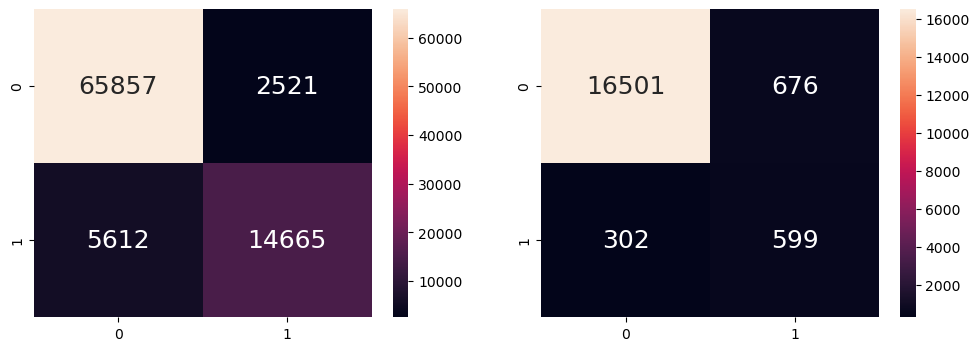

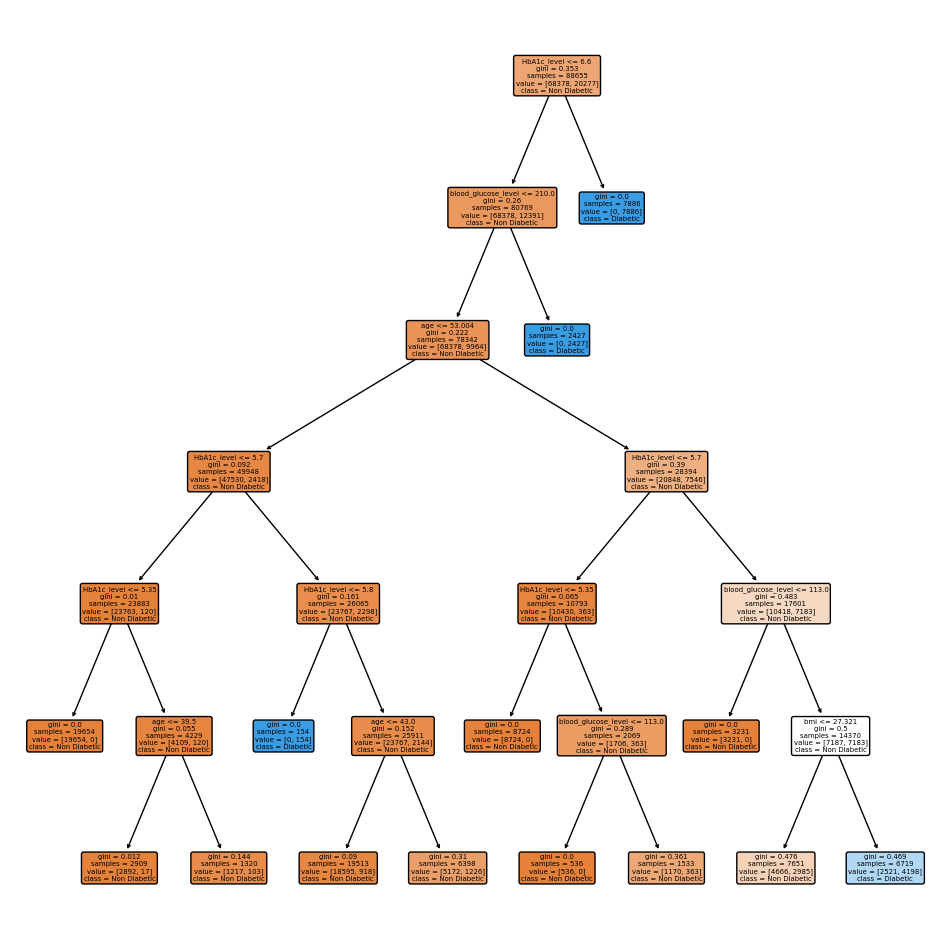

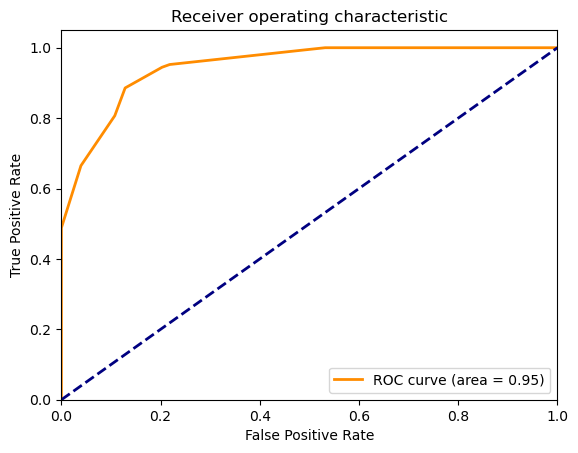

AUC score: 0.9475157686080624


In [6]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy']
}

dectree = DecisionTreeClassifier()
grid_search = GridSearchCV(dectree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
dectree = DecisionTreeClassifier(**best_params)

# Decision Tree using Train Data 
dectree.fit(X_train, y_train)               # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

train_cnf_matrix = confusion_matrix(y_train, y_train_pred)
train_TP = train_cnf_matrix[1, 1]
train_FP = train_cnf_matrix[0, 1]
train_TN = train_cnf_matrix[0, 0]
train_FN = train_cnf_matrix[1, 0]

test_cnf_matrix = confusion_matrix(y_test, y_test_pred)
test_TP = test_cnf_matrix[1, 1]
test_FP = test_cnf_matrix[0, 1]
test_TN = test_cnf_matrix[0, 0]
test_FN = test_cnf_matrix[1, 0]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Positive Rate \t\t:", train_TP / (train_TP + train_FN))
print("False Positive Rate \t\t:", train_FP / (train_FP + train_TN))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Positive Rate \t\t:", test_TP / (test_TP + test_FN))
print("False Positive Rate \t\t:", test_FP / (test_FP + test_TN))
print()

# Print the classification report for Train and Test
print("Classification Report for Train Dataset")
print(classification_report(y_train, y_train_pred))
print()
print("Classification Report for Test Dataset")
print(classification_report(y_test, y_test_pred))

#Print the importance
importances = dectree.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(feature, importance)


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=X_train.columns,
          class_names=["Non Diabetic", "Diabetic"])

# Make predictions on the testing set
y_scores = dectree.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

### Evaluating Relationships between predictors and response variable

   -  For this model, there is a new metric called the importance score. Importance score is a measure of the relative importance of a feature in a non-linear model. This feature shows the contribution of each variable to the model's performance in predicting the outcome. It is calculated as the reduction in the impurity of increase in the information gain resulting from the inclusion of the feature in the model. It can also be used to rank the predictors by their importance, with the most important predictor having the highest score.
   -  Based on the importance score of each variables in this decision tree model. The variable that hold the most importance is HbA1c_level having the highest impact on the response variable. The second ranked variable would be the blood glucose level followed by age then bmi. This helps us to conclude that the best predictor would be the HbA1c_level and it is significantly higher than all three other predictors. while bmi having the least importance would be the worst predictor in the case of this decision tree model

### Evaluating performance of Decision Tree model

 - Firstly the accuracy of this decision tree model is 0.946 which can be considered as a good value indicating that this model can be effective in predicting the diabetes response
 - For the response class 'Diabetes' the precision of this data set showed that it predicted 47% correctly as its precision is 0.47. The recall was 0.66 and f1-score was also 0.55 which shows that this model have the moderate ability to predict the positive class which is our aim and f1-score of this level shows the harmonious relation and overall the model did well in prediction the response.
 - Additionally, the fine-tuning using GridSearchCV trained the model by choosing the best combination of hyperparameters. Some of the hyperparamters that were tuned were the maximum depth of the devision tree, minimum number pf samples required to split and internal node or to be at a lead node and the "criterion" function that measures the quality of a split.
 - However, we still want to continue to explore other type of model with a similar foundation of using decision trees as with a accuracy of 0.946 which is higher than that of the first model, we believe that the results of the relationships of the predictors and outcome variable are more reliable through this form of training.